In [1]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud,STOPWORDS


In [2]:
# Importing the dataset
dataset = pd.read_csv('bible.txt', delimiter = "\t", quoting = 3)

In [3]:
#bad = [line.rstrip('\n') for line in open('bad.txt')]
#good = [line.rstrip('\n') for line in open('good.txt')]

bad = pd.read_csv('bad.txt', delimiter = "\n", quoting = 3)
good = pd.read_csv('good.txt', delimiter = "\n", quoting = 3)

In [4]:
dataset['book'] = pd.DataFrame(dataset.book.str.split().tolist(),
                                   columns = ['book','verse','2', '3'])

In [5]:
# Cleaning the words in bible.txt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /home/caio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#cleaning the Bad and Good words
bad_corpus = []
for i in range(0, len(bad)):
    review = re.sub('[^a-zA-Z]', ' ', bad['word'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    bad_corpus.append(review)
bad_corpus = list(set(bad_corpus))

good_corpus = []
for i in range(0, len(good)):
    review = re.sub('[^a-zA-Z]', ' ', good['word'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    good_corpus.append(review)
good_corpus = list(set(good_corpus))

In [8]:
#Counting good words in every sentence
good_list = []
for sentence in corpus:
    score = 0
    for word in good_corpus:
        if word in sentence:
            score = score + 1
    good_list.append(score)

In [9]:
#Counting bad words in every sentence
bad_list = []
for sentence in corpus:
    score = 0
    for word in bad_corpus:
        if word in sentence:
            score = score + 1
    bad_list.append(score)

In [51]:
import matplotlib.pyplot as plt

In [ ]:
#def wordcloud_draw(dataset, color = 'black'):
str1 = ''.join(good_corpus)
wordcloud = WordCloud(
                  background_color='black',
                  width=2500,
                  height=2000
                 ).generate(str1)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
#def wordcloud_draw(dataset, color = 'black'):
str2 = ''.join(bad_corpus)
wordcloud = WordCloud(
                  background_color='black',
                  width=2500,
                  height=2000
                 ).generate(str2)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
dataset['good'] = good_list
dataset['bad'] = bad_list

In [11]:
dataset_ratio= dataset.groupby(['book']).sum()

In [12]:
dataset_ratio['ratio'] = dataset_ratio.bad / dataset_ratio.good

In [30]:
dataset_ratio = dataset_ratio.reset_index()

In [41]:
dataset_ratio.sort_values(['ratio'], ascending=True, inplace=True)

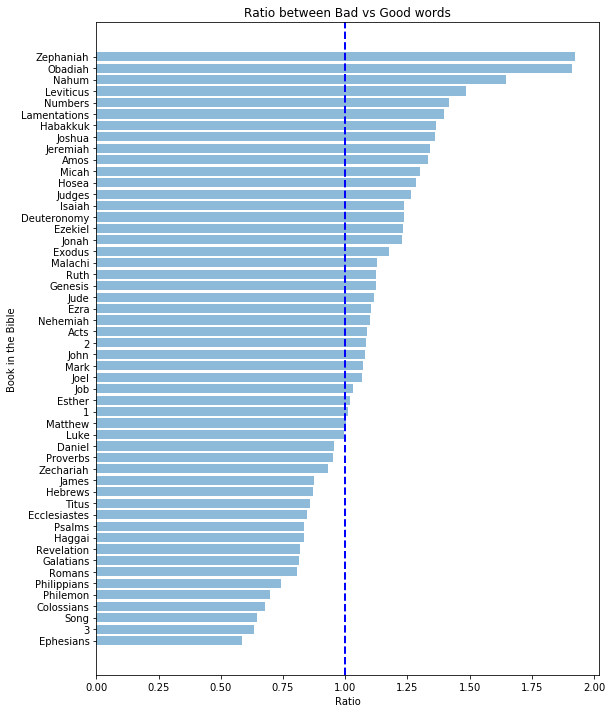

In [48]:
y_pos = np.arange(len(dataset_ratio.book))
plt.figure(figsize=(9,12))
plt.barh(y_pos, dataset_ratio.ratio, align='center', alpha=0.5)
plt.yticks(y_pos, dataset_ratio.book)
plt.axvline(1, color='b', linestyle='dashed', linewidth=2)
plt.title('Ratio between Bad vs Good words')
plt.xlabel('Ratio')
plt.ylabel('Book in the Bible')
 
plt.show()

In [23]:
dataset_ratio[dataset_ratio.ratio==max(dataset_ratio.ratio)]

,good,bad,ratio
book,,,
Zephaniah,129,248,1.922481
